In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We calculate the data covariance matrix, then the precision matrix with Hartlap factor to unbias it

In [2]:
#The data covariance matrix is of LSST level
corr2pt = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_cross_mnv0.0_om0.3_As2.1_z11.0_z21.5_relizations10000_circular_LSST.csv', sep=' ')
corr2pt = corr2pt.iloc[:,:]
covariance = corr2pt.cov()
covariance = covariance.to_numpy()
covariance = covariance * (5/18000)

psi = np.linalg.inv(covariance)
#unbias correction from Hartlap2006
psi_true = (9999-20-2)/(9999-1)*psi

In [21]:
#This is for tomography (multiple redshift bins)
#corr2pt1 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_mnv0.1_om0.3_As2.1_z0.5_relizations10000_circular_LSST.csv', sep=' ')
corr2pt2 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_mnv0.1_om0.3_As2.1_z1.0_relizations10000_circular_LSST_whitenoise.csv', sep=' ')
corr2pt3 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_mnv0.1_om0.3_As2.1_z1.5_relizations10000_circular_LSST_whitenoise.csv', sep=' ')
#corr2pt12 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_cross_mnv0.1_om0.3_As2.1_z10.5_z21.0_relizations10000_circular_LSST.csv', sep=' ')
#corr2pt13 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_cross_mnv0.1_om0.3_As2.1_z10.5_z21.5_relizations10000_circular_LSST.csv', sep=' ')
corr2pt23 = pd.read_csv('correlationfunc/2ptfunc_circpatch_wn/2pt_cross_mnv0.1_om0.3_As2.1_z11.0_z21.5_relizations10000_circular_LSST_whitenoise.csv', sep=' ')

#full_vector = pd.concat([corr2pt1, corr2pt2, corr2pt3, corr2pt12, corr2pt13, corr2pt23], axis=1)
full_vector = pd.concat([corr2pt2, corr2pt3, corr2pt23], axis=1)
covariance = full_vector.cov()
covariance = covariance.to_numpy()
covariance = covariance * (5/18000)

psi = np.linalg.inv(covariance)
#unbias correction from Hartlap2006
psi_true = (9999-60-2)/(9999-1)*psi

Then we import the data vector of 2-point function for different cosmologies

In [3]:
corr2pt_Mv1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.3_M_v0.095_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_Mv2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.3_M_v0.105_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_Mv1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.3_M_v0.095_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_Mv2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.3_M_v0.105_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')

corr2pt_Omega1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.285_M_v0.1_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_Omega2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.315_M_v0.1_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_Omega1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.285_M_v0.1_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_Omega2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.315_M_v0.1_A_s2.1e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')

#the change in As is 5%
corr2pt_As1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.3_M_v0.1_A_s1.995e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_As2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_avebins_Omega_m0.3_M_v0.1_A_s2.205e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_As1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.3_M_v0.1_A_s1.995e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')
corr2pt_cross_As2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_cross_avebins_Omega_m0.3_M_v0.1_A_s2.205e-09_zbins3_lmax5e4_kmax30.0_halofit_CLASS_shellfitting.csv', sep=' ')

#the change in As is 2.5%
#corr2pt_As1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_Omega_m0.3_M_v0.1_A_s2.0475e-09_zbins3_l5e4_kmax30.0_halofit_CLASS_wo_shellfitting.csv', sep=' ')
#corr2pt_As2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_Omega_m0.3_M_v0.1_A_s2.1525e-09_zbins3_l5e4_kmax30.0_halofit_CLASS_wo_shellfitting.csv', sep=' ')

#the change in As is 1%
#corr2pt_As1 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_Omega_m0.3_M_v0.1_A_s2.079e-09_zbins3_l5e4_kmax30.0_halofit_CLASS_wo_shellfitting.csv', sep=' ')
#corr2pt_As2 = pd.read_csv('correlationfunc/theoretical_2ptfunc/l20000/2pt_Omega_m0.3_M_v0.1_A_s2.121e-09_zbins3_l5e4_kmax30.0_halofit_CLASS_wo_shellfitting.csv', sep=' ')

In [4]:
#The data vector at each single tomographic selection (including both auto-correlation and cross-correlation) for variable Mv
corr2pt_Mv1_z1 = corr2pt_Mv1.iloc[:,1]
corr2pt_Mv1_z2 = corr2pt_Mv1.iloc[:,2]
corr2pt_Mv1_z3 = corr2pt_Mv1.iloc[:,3]

corr2pt_Mv2_z1 = corr2pt_Mv2.iloc[:,1]
corr2pt_Mv2_z2 = corr2pt_Mv2.iloc[:,2]
corr2pt_Mv2_z3 = corr2pt_Mv2.iloc[:,3]

corr2pt_cross_Mv1_z12 = corr2pt_cross_Mv1.iloc[:,1]
corr2pt_cross_Mv1_z13 = corr2pt_cross_Mv1.iloc[:,2]
corr2pt_cross_Mv1_z23 = corr2pt_cross_Mv1.iloc[:,3]

corr2pt_cross_Mv2_z12 = corr2pt_cross_Mv2.iloc[:,1]
corr2pt_cross_Mv2_z13 = corr2pt_cross_Mv2.iloc[:,2]
corr2pt_cross_Mv2_z23 = corr2pt_cross_Mv2.iloc[:,3]

In [5]:
#The data vector at each single tomographic selection (including both auto-correlation and cross-correlation) for variable Omega_m
corr2pt_Omega1_z1 = corr2pt_Omega1.iloc[:,1]
corr2pt_Omega1_z2 = corr2pt_Omega1.iloc[:,2]
corr2pt_Omega1_z3 = corr2pt_Omega1.iloc[:,3]

corr2pt_Omega2_z1 = corr2pt_Omega2.iloc[:,1]
corr2pt_Omega2_z2 = corr2pt_Omega2.iloc[:,2]
corr2pt_Omega2_z3 = corr2pt_Omega2.iloc[:,3]

corr2pt_cross_Omega1_z12 = corr2pt_cross_Omega1.iloc[:,1]
corr2pt_cross_Omega1_z13 = corr2pt_cross_Omega1.iloc[:,2]
corr2pt_cross_Omega1_z23 = corr2pt_cross_Omega1.iloc[:,3]

corr2pt_cross_Omega2_z12 = corr2pt_cross_Omega2.iloc[:,1]
corr2pt_cross_Omega2_z13 = corr2pt_cross_Omega2.iloc[:,2]
corr2pt_cross_Omega2_z23 = corr2pt_cross_Omega2.iloc[:,3]

In [6]:
#The data vector at each single tomographic selection (including both auto-correlation and cross-correlation) for variable As
corr2pt_As1_z1 = corr2pt_As1.iloc[:,1]
corr2pt_As1_z2 = corr2pt_As1.iloc[:,2]
corr2pt_As1_z3 = corr2pt_As1.iloc[:,3]

corr2pt_As2_z1 = corr2pt_As2.iloc[:,1]
corr2pt_As2_z2 = corr2pt_As2.iloc[:,2]
corr2pt_As2_z3 = corr2pt_As2.iloc[:,3]

corr2pt_cross_As1_z12 = corr2pt_cross_As1.iloc[:,1]
corr2pt_cross_As1_z13 = corr2pt_cross_As1.iloc[:,2]
corr2pt_cross_As1_z23 = corr2pt_cross_As1.iloc[:,3]

corr2pt_cross_As2_z12 = corr2pt_cross_As2.iloc[:,1]
corr2pt_cross_As2_z13 = corr2pt_cross_As2.iloc[:,2]
corr2pt_cross_As2_z23 = corr2pt_cross_As2.iloc[:,3]

In [50]:
corr2pt_As1 = corr2pt_As1.iloc[8:,:]
corr2pt_As2 = corr2pt_As2.iloc[8:,:]
corr2pt_Mv1 = corr2pt_Mv1.iloc[8:,:]
corr2pt_Mv2 = corr2pt_Mv2.iloc[8:,:]
corr2pt_Omega1 = corr2pt_Omega1.iloc[8:,:]
corr2pt_Omega2 = corr2pt_Omega2.iloc[8:,:]

In [18]:
corr2pt_As1 = corr2pt_As1.to_numpy()
corr2pt_As2 = corr2pt_As2.to_numpy()
corr2pt_Mv1 = corr2pt_Mv1.to_numpy()
corr2pt_Mv2 = corr2pt_Mv2.to_numpy()
corr2pt_Omega1 = corr2pt_Omega1.to_numpy()
corr2pt_Omega2 = corr2pt_Omega2.to_numpy()

In [7]:
data_As1 = corr2pt_cross_As1_z23.to_numpy()
data_As2 = corr2pt_cross_As2_z23.to_numpy()
data_Omega1 = corr2pt_cross_Omega1_z23.to_numpy()
data_Omega2 = corr2pt_cross_Omega2_z23.to_numpy()
data_Mv1 = corr2pt_cross_Mv1_z23.to_numpy()
data_Mv2 = corr2pt_cross_Mv2_z23.to_numpy()

for the data vector of tomography with redshift bin1 and bin2

In [26]:
data_Mv1 = pd.concat([corr2pt_Mv1_z2, corr2pt_Mv1_z3, corr2pt_cross_Mv1_z23], axis=0)
data_Mv2 = pd.concat([corr2pt_Mv2_z2, corr2pt_Mv2_z3, corr2pt_cross_Mv2_z23], axis=0)
data_Omega1 = pd.concat([corr2pt_Omega1_z2, corr2pt_Omega1_z3, corr2pt_cross_Omega1_z23], axis=0)
data_Omega2 = pd.concat([corr2pt_Omega2_z2, corr2pt_Omega2_z3, corr2pt_cross_Omega2_z23], axis=0)
data_As1 = pd.concat([corr2pt_As1_z2, corr2pt_As1_z3, corr2pt_cross_As1_z23], axis=0)
data_As2 = pd.concat([corr2pt_As2_z2, corr2pt_As2_z3, corr2pt_cross_As2_z23], axis=0)

for the data vector of tomography with all three redshift bins

In [85]:
data_Mv1 = pd.concat([corr2pt_Mv1_z1, corr2pt_Mv1_z2, corr2pt_Mv1_z3, corr2pt_cross_Mv1_z12, corr2pt_cross_Mv1_z13, corr2pt_cross_Mv1_z23], axis=0)
data_Mv2 = pd.concat([corr2pt_Mv2_z1, corr2pt_Mv2_z2, corr2pt_Mv2_z3, corr2pt_cross_Mv2_z12, corr2pt_cross_Mv2_z13, corr2pt_cross_Mv2_z23], axis=0)
data_Omega1 = pd.concat([corr2pt_Omega1_z1, corr2pt_Omega1_z2, corr2pt_Omega1_z3, corr2pt_cross_Omega1_z12, corr2pt_cross_Omega1_z13, corr2pt_cross_Omega1_z23], axis=0)
data_Omega2 = pd.concat([corr2pt_Omega2_z1, corr2pt_Omega2_z2, corr2pt_Omega2_z3, corr2pt_cross_Omega2_z12, corr2pt_cross_Omega2_z13, corr2pt_cross_Omega2_z23], axis=0)
data_As1 = pd.concat([corr2pt_As1_z1, corr2pt_As1_z2, corr2pt_As1_z3, corr2pt_cross_As1_z12, corr2pt_cross_As1_z13, corr2pt_cross_As1_z23], axis=0)
data_As2 = pd.concat([corr2pt_As2_z1, corr2pt_As2_z2, corr2pt_As2_z3, corr2pt_cross_As2_z12, corr2pt_cross_As2_z13, corr2pt_cross_As2_z23], axis=0)

In [27]:
data_As1 = data_As1.to_numpy()
data_As2 = data_As2.to_numpy()
data_Mv1 = data_Mv1.to_numpy()
data_Mv2 = data_Mv2.to_numpy()
data_Omega1 = data_Omega1.to_numpy()
data_Omega2 = data_Omega2.to_numpy()

In [8]:
num_para = 3
delta_Mv = 0.005
delta_Omega = 0.015

#5% change
delta_As = 0.105e-9

#2.5% change
#delta_As = 0.0525e-9

#1.0% change
#delta_As = 0.021e-9

derivative = np.zeros((num_para, len(data_As1)))

derivative[0,:] = (data_Mv2 - data_Mv1)/(2*delta_Mv)
derivative[1,:] = (data_Omega2 - data_Omega1)/(2*delta_Omega)
derivative[2,:] = (data_As2 - data_As1)/(2*delta_As)

Here we calculate the vector of derivative of 2-point function w.r.t the 3 constrained parameters using central difference at a certain redshift 

In [19]:
redshift_bin = 3
num_para = 3
delta_Mv = 0.005
delta_Omega = 0.015

#5% change
delta_As = 0.105e-9

#2.5% change
#delta_As = 0.0525e-9

#1.0% change
#delta_As = 0.021e-9

derivative = np.zeros((num_para, len(corr2pt_As1)))

derivative[0,:] = (corr2pt_Mv2[:,redshift_bin] - corr2pt_Mv1[:, redshift_bin])/(2*delta_Mv)
derivative[1,:] = (corr2pt_Omega2[:, redshift_bin] - corr2pt_Omega1[:, redshift_bin])/(2*delta_Omega)
derivative[2,:] = (corr2pt_As2[:, redshift_bin] - corr2pt_As1[:, redshift_bin])/(2*delta_As)

In [74]:
#compute derivatives for any two parameters
redshift_bin = 3
num_para = 2
delta_Mv = 0.005
delta_Omega = 0.015

#5% change
delta_As = 0.105e-9

#2.5% change
#delta_As = 0.0525e-9

derivative = np.zeros((num_para, len(corr2pt_As1)))

derivative[0,:] = (corr2pt_Mv2[:,redshift_bin] - corr2pt_Mv1[:, redshift_bin])/(2*delta_Mv)
#derivative[1,:] = (corr2pt_Omega2[:, redshift_bin] - corr2pt_Omega1[:, redshift_bin])/(2*delta_Omega)
derivative[1,:] = (corr2pt_As2[:, redshift_bin] - corr2pt_As1[:, redshift_bin])/(2*delta_As)

In [42]:
derivative1 = derivative

In [46]:
derivative2 = derivative

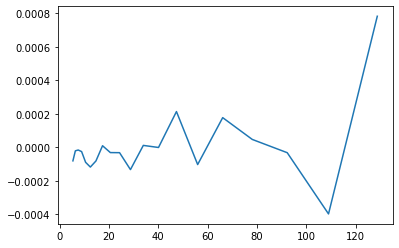

In [51]:
plt.plot(r, derivative2[2,:]/derivative1[2,:] - 1)

We could now compute the Fisher matrix

In [9]:
F = np.zeros((num_para, num_para))

for i in range(num_para):
    for j in range(num_para):
        matrix1 = np.matmul(derivative[i,:], psi_true)
        F[i,j] = np.matmul(matrix1, derivative[j,:])

Fisher = pd.DataFrame(F)
Fisher.to_csv('Fisher_matrix_z23_shellcorrection.csv', sep=' ', index=False)
         

compute another Fisher matrix with Mv fixed

In [75]:
F = np.zeros((2, 2))

for i in range(2):
    for j in range(2):
        matrix1 = np.matmul(derivative[i,:], psi_true)
        F[i,j] = np.matmul(matrix1, derivative[j,:])

Fisher = pd.DataFrame(F)
Fisher.to_csv('Fisher_matrix_z1.5_Omegafixed.csv', sep=' ', index=False)

We plot the derivative values at different redshifts against angular bins with 5 percent difference in each parameter

In [20]:
r = corr2pt_As1[:,0]

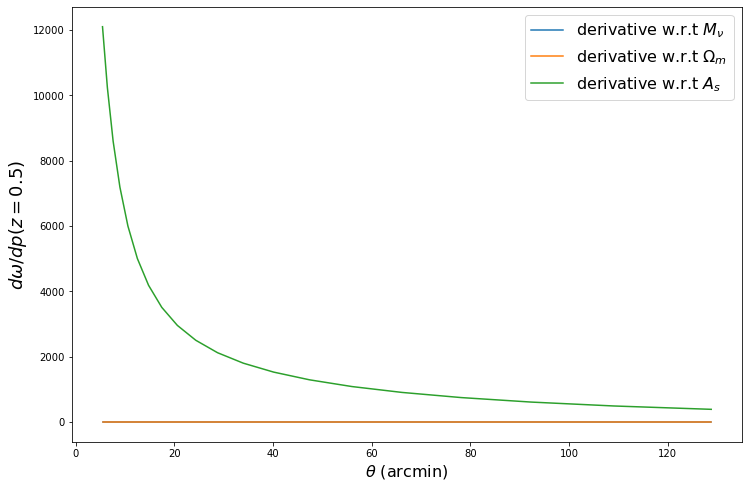

In [33]:
#derivative at z=0.5
plt.figure(figsize=(12,8))
plt.plot(r, derivative[0,:], label='derivative w.r.t' + ' ' + r"$M_{\nu}$")
plt.plot(r, derivative[1,:], label='derivative w.r.t' + ' ' + r"$\Omega_m$")
plt.plot(r, derivative[2,:], label='derivative w.r.t' + ' ' + r"$A_s$")
plt.xlabel(r'$\theta$' + ' '+'(arcmin)', fontsize=16)
plt.ylabel(r'$d\omega/dp(z=0.5)$', fontsize=18)
plt.legend(fontsize=16)

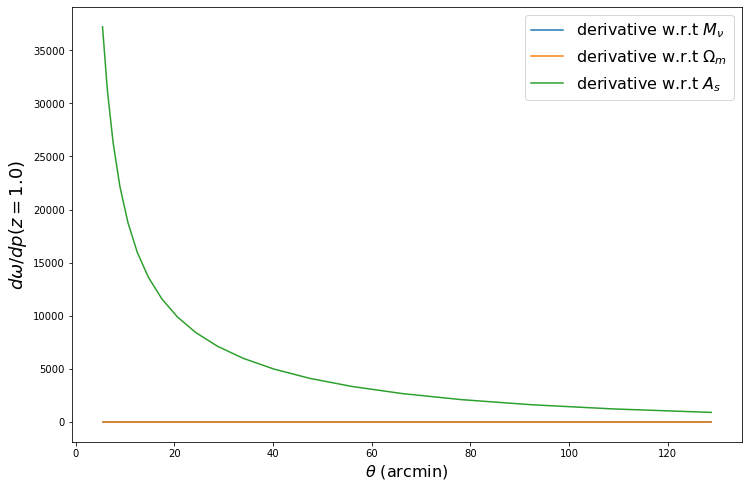

In [35]:
#derivative at z=1.0
plt.figure(figsize=(12,8))
plt.plot(r, derivative[0,:], label='derivative w.r.t' + ' ' + r"$M_{\nu}$")
plt.plot(r, derivative[1,:], label='derivative w.r.t' + ' ' + r"$\Omega_m$")
plt.plot(r, derivative[2,:], label='derivative w.r.t' + ' ' + r"$A_s$")
plt.xlabel(r'$\theta$' + ' '+'(arcmin)', fontsize=16)
plt.ylabel(r'$d\omega/dp(z=1.0)$', fontsize=18)
plt.legend(fontsize=16)

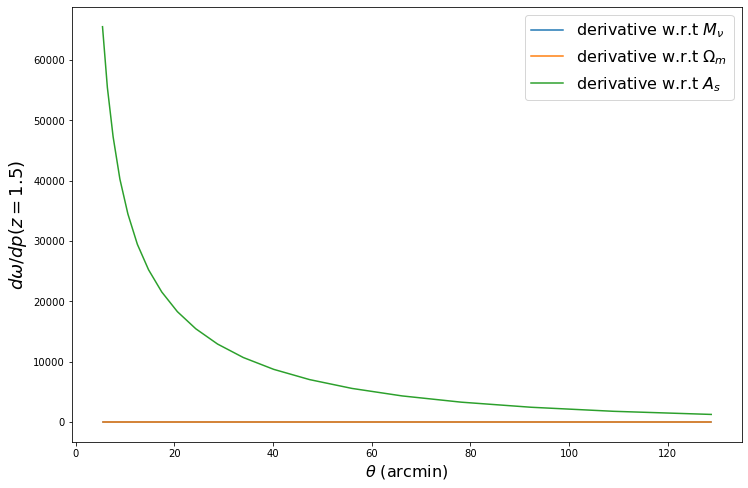

In [37]:
#derivative at z=1.5
plt.figure(figsize=(12,8))
plt.plot(r, derivative[0,:], label='derivative w.r.t' + ' ' + r"$M_{\nu}$")
plt.plot(r, derivative[1,:], label='derivative w.r.t' + ' ' + r"$\Omega_m$")
plt.plot(r, derivative[2,:], label='derivative w.r.t' + ' ' + r"$A_s$")
plt.xlabel(r'$\theta$' + ' '+'(arcmin)', fontsize=16)
plt.ylabel(r'$d\omega/dp(z=1.5)$', fontsize=18)
plt.legend(fontsize=16)

We plot the derivative values at different redshifts against angular bins with 2.5 percent difference in each parameter

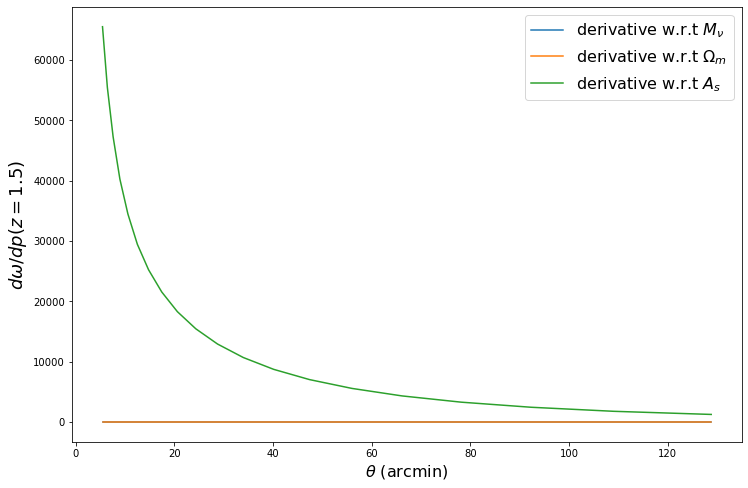

In [41]:
#derivative at z=1.5
plt.figure(figsize=(12,8))
plt.plot(r, derivative[0,:], label='derivative w.r.t' + ' ' + r"$M_{\nu}$")
plt.plot(r, derivative[1,:], label='derivative w.r.t' + ' ' + r"$\Omega_m$")
plt.plot(r, derivative[2,:], label='derivative w.r.t' + ' ' + r"$A_s$")
plt.xlabel(r'$\theta$' + ' '+'(arcmin)', fontsize=16)
plt.ylabel(r'$d\omega/dp(z=1.5)$', fontsize=18)
plt.legend(fontsize=16)

In [6]:
np.linspace(0, 20000, 20001)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.9998e+04, 1.9999e+04,
       2.0000e+04])